# Heart Disease - Classification Analysis

![](dataset-cover.jpg)

## Content Overview

1. Context and Scope
2. Evaluation
3. Features
4. Data Exploration
5. Modelling
6. Experimentation & Evaluation

## 1. Context and Scope

The project aims to analyze patients medical records to predict whether or not they have heart disease.

The dataset used in this analysis dates back from `1988` and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains `76 attributes`, including the predicted attribute, but all published experiments refer to using a `subset of 14` of them. The `target` field refers to the presence of heart disease in the patient. It is integer valued `0 = no disease` and `1 = disease`.

<b>Data Source</b>: <a href='https://archive.ics.uci.edu/dataset/45/heart+disease'>UCI Machine Learning</a>

## 2. Evaluation

The model should achieve approx. <b>%95</b> accuracy at predicting whether a patient has heart disease or not.

## 3. Features 

* `age` - age in years
* `sex` - (1 = male; 0 = female)
* `cp` - chest pain type
* * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
* `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) -
* * anything above 130-140 is typically cause for concern
* `chol` - serum cholestoral in mg/dl
* * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
* `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* * '>126' mg/dL signals diabetes
* `restecg` - resting electrocardiographic results
* * 0: Nothing to note
  * 1: ST-T Wave abnormality
  * * can range from mild symptoms to severe problems
    * signals non-normal heart beat
* * 2: Possible or definite left ventricular hypertrophy
  * * Enlarged heart's main pumping chamber
* `thalach` - maximum heart rate achieved
* `exang` - exercise induced angina (1 = yes; 0 = no)
* `oldpeak` - ST depression induced by exercise relative to rest
* * looks at stress of heart during excercise
  * unhealthy heart will stress more
* `slope` - the slope of the peak exercise ST segment
* * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downsloping: signs of unhealthy heart
* `ca` - number of major vessels (0-3) colored by flourosopy
* * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots)
* `thal` - thalium stress result
* * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
* `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)=yes, 0=no) (= the predicted attribute)

## 4. Data Exploration

#### 4.1 Import Tools and Dataset

In [1]:
# EDA and Visualization Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Classification Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scikit-Learn Tools and Evaluation Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

sns.set_theme()

df = pd.read_csv('Data/heart-disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 4.2 Data Exploration

In [2]:
# Check columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
# Check dimensions
df.shape

(303, 14)

In [4]:
# Check for nulls
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Check duplicates
df.duplicated().sum()

1

In [6]:
# Drop duplicates
df = df[~df.duplicated()]

In [7]:
# Basic descriptive statistic
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


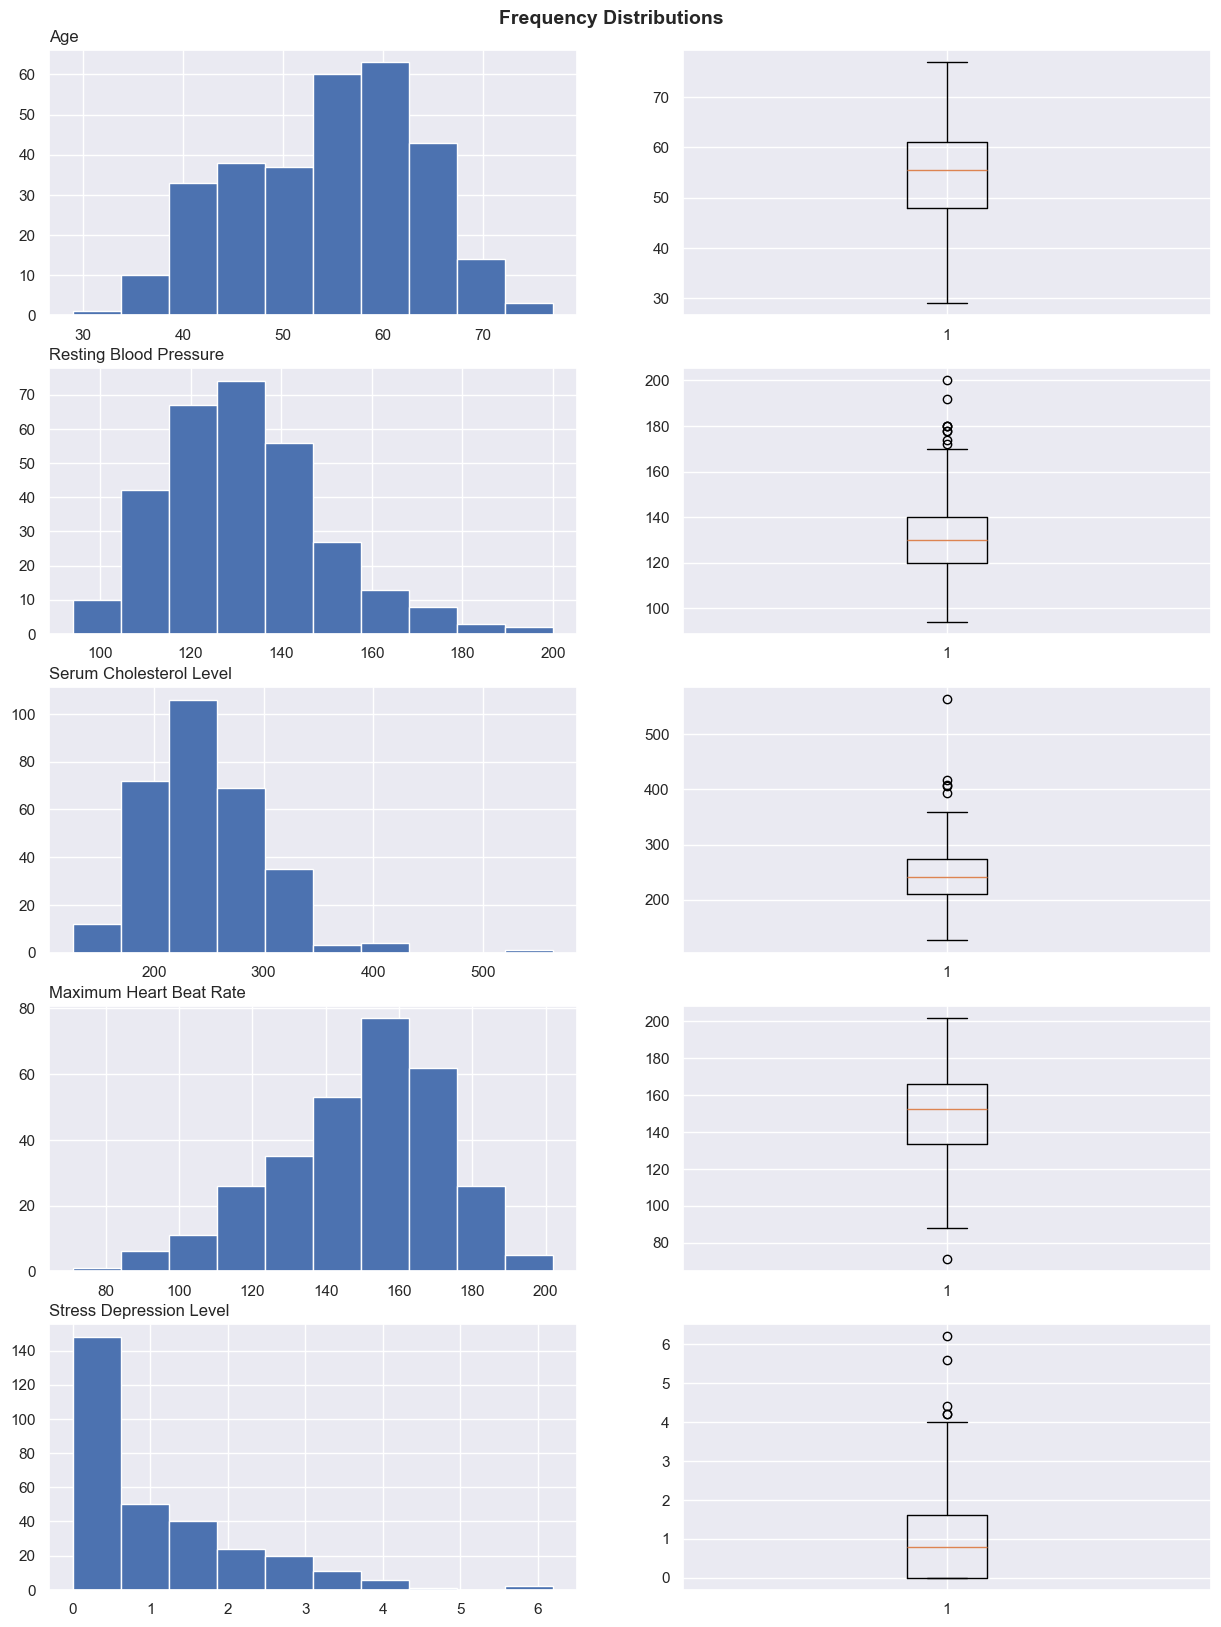

In [8]:
# Check frequency distribution of age
fig, ((ax_age, ax_age1),
      (ax_trestbps, ax_trestbps1),
      (ax_chol, ax_chol1),
      (ax_thalach, ax_thalach1),
      (ax_oldpeak, ax_oldpeak1)) = plt.subplots(nrows=5,
                                                ncols=2,
                                                figsize=(15, 20))

ax_age.hist(df['age'], bins=10)
ax_age1.boxplot(df['age'])

ax_trestbps.hist(df['trestbps'], bins=10)
ax_trestbps1.boxplot(df['trestbps'])

ax_chol.hist(df['chol'], bins=10)
ax_chol1.boxplot(df['chol'])

ax_thalach.hist(df['thalach'], bins=10)
ax_thalach1.boxplot(df['thalach'])

ax_oldpeak.hist(df['oldpeak'], bins=10)
ax_oldpeak1.boxplot(df['oldpeak'])

ax_age.set_title('Age', loc='left')
ax_trestbps.set_title('Resting Blood Pressure', loc='left')
ax_chol.set_title('Serum Cholesterol Level', loc='left')
ax_thalach.set_title('Maximum Heart Beat Rate', loc='left')
ax_oldpeak.set_title('Stress Depression Level', loc='left')

fig.suptitle('Frequency Distributions',
             y=0.9,
             fontsize=14,
             fontweight='bold');

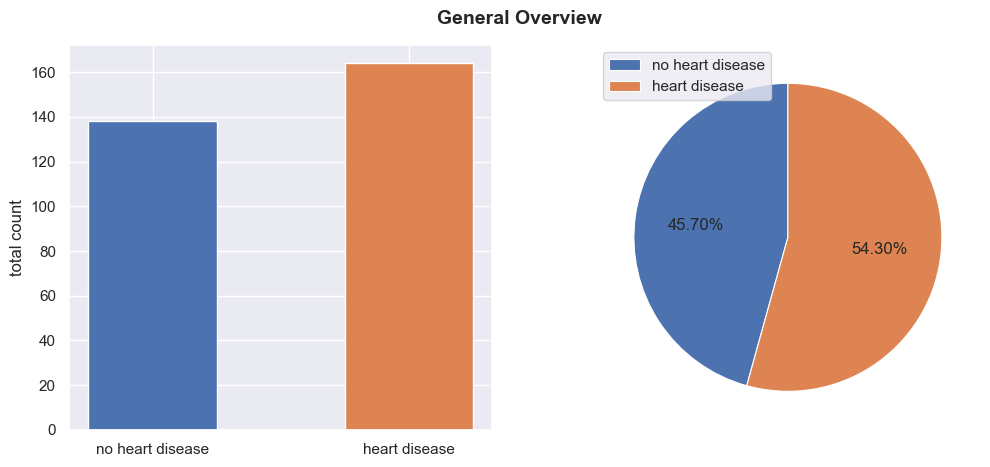

In [9]:
# Heart Disease vs No Heart Disease (Data balance and general overview)
hd_stats = df['target'].value_counts().sort_index()

hd_stats.index = ['no heart disease', 'heart disease']

fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(12, 5))

sns_blue = sns.color_palette().as_hex()[0]
sns_orange = sns.color_palette().as_hex()[1]

ax1.bar(hd_stats.index,
        hd_stats.values,
        color=[sns_blue, sns_orange],
        width=0.5)

ax1.set_xticks(hd_stats.index)
ax1.set_ylabel('total count')

ax2.pie(hd_stats,
        autopct='%.2f%%',
        startangle=90,
        wedgeprops={'linewidth': 0.8})

ax2.legend(['no heart disease', 'heart disease'])

fig.suptitle('General Overview',
             y=0.95,
             fontsize=14,
             fontweight='bold');

The target labels appear to be balanced as shown by the overall distribution of patients, where `54.3%` have heart disease and `45.7%` don't.

#### Goal: 

* Understanding how features interact with the target label?
* Determine which features contribute the most to higher heart disease rate among patients.
* Do we need to reduce the number of features for maximum accuracy?

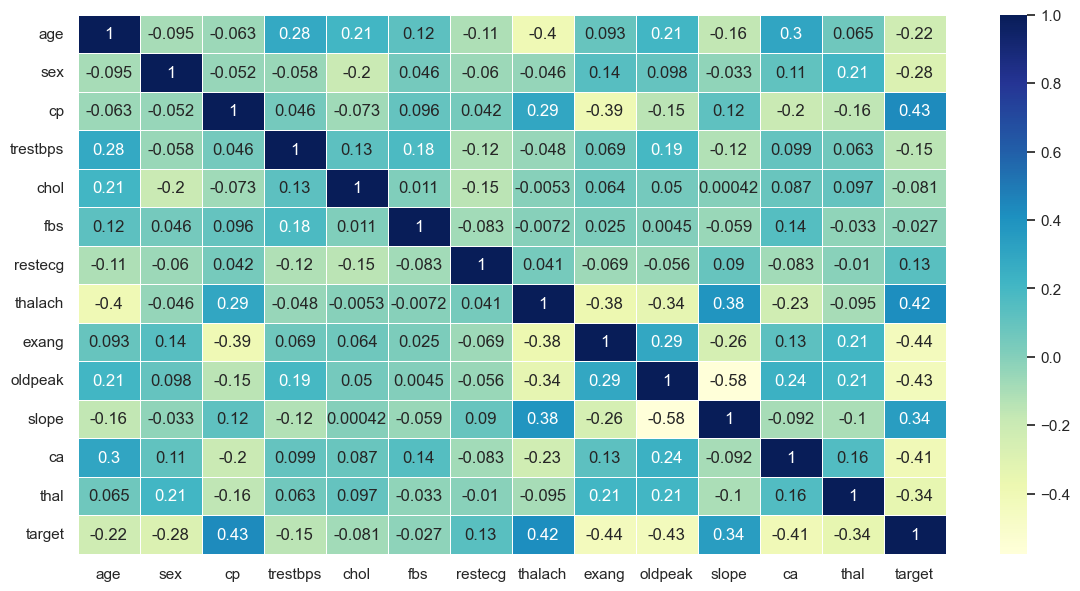

In [10]:
corr_matrix = df.loc[:, df.columns != 'age_group'].corr()

fig, ax = plt.subplots(figsize=(14, 7))

sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            cmap='YlGnBu');

The correlation matrix shows how the features are inter-related as well as their relationship to the target labels.

For instance:
* `age` is negatively correlated with `thalach` (maximum heart rate) and `target` which suggests that older patients are likely to have lower maximum heart rate resulting in higher exposure to heart disease.
* `cp` is positively correlated with `target` suggesting that different types of chest pain are associated with the likelihood of heart disease problems.
* `exang` appears to be negatively correlated with `target`, which, contrary to common medical knowledge, suggest that patients with exercise-induced angina — often seen as a risk indicator for heart disease, are less likely to have heart disease in our dataset. (Requires further investigation)
* etc.

>> #### Heart Disease Rate by Gender

In [11]:
df['sex'].value_counts().sort_index()

sex
0     96
1    206
Name: count, dtype: int64

In [12]:
hd_by_sex = pd.crosstab(df['sex'], df['target'])

hd_by_sex.index = ['female', 'male']

hd_by_sex['total_count'] = hd_by_sex[0] + hd_by_sex[1]
hd_by_sex['% no heart disease (rel)'] = np.round(hd_by_sex[0] / hd_by_sex['total_count'] * 100, 2)
hd_by_sex['% heart disease (rel)'] = np.round(hd_by_sex[1] / hd_by_sex['total_count'] * 100, 2)

hd_by_sex = hd_by_sex.sort_values(by='total_count', ascending=False)

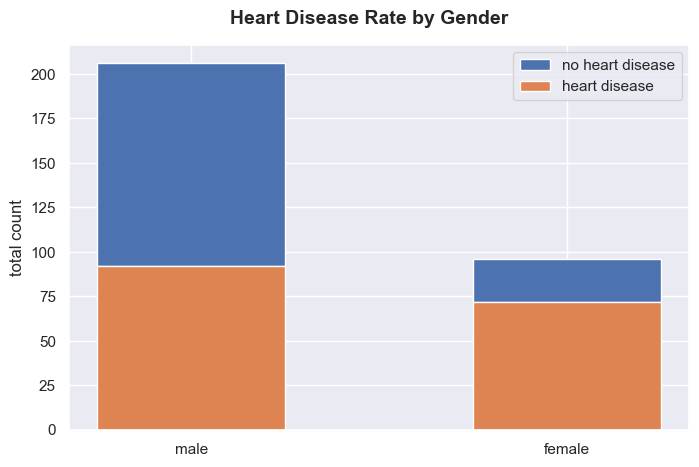

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(hd_by_sex.index,
       hd_by_sex[0],
       bottom=hd_by_sex[1],
       label='no heart disease',
       width=0.5)

ax.bar(hd_by_sex.index,
       hd_by_sex[1],
       label='heart disease',
       width=0.5)

ax.legend()
ax.set_ylabel('total count')

fig.suptitle('Heart Disease Rate by Gender',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [14]:
hd_by_sex

target,0,1,total_count,% no heart disease (rel),% heart disease (rel)
male,114,92,206,55.34,44.66
female,24,72,96,25.00,75.00


* The number of male patients present in the dataset is more than twice the number of female patients.
* <b>Female patients</b> have relatively higher heart disease rate — `75%`, compared to male patients — `44.6%`.

>> #### Heart Disease Rate by Age

Earlier, we saw that there is a negative correlation between `age` and `thalach` (maximum heart rate achieved). Let's take a closer look at this relationship using a <b>scatterplot</b> and examine how both variables interact with the target labels.

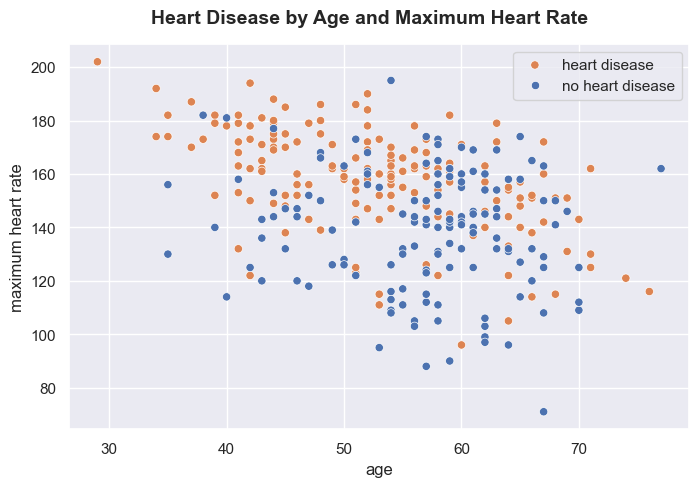

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.scatterplot(data=df,
                     x=df['age'],
                     y=df['thalach'],
                     hue=df['target']);

ax.set_xlabel('age')
ax.set_ylabel('maximum heart rate')
ax.legend(['heart disease', 'no heart disease'])

fig.suptitle('Heart Disease by Age and Maximum Heart Rate',
             y=0.95,
             fontsize=14,
             fontweight='bold');

* The scatterplot shows the relationship between `age` and maximum heart rate for patients with and without heart disease, whereas the age of an individual increases, their maximum heart rate decreases.
* The absence and presence of heart disease among patients are widely distributed across all ages as the scatterplot shows no obvious patterns to neither classes.

>>> #### Heart Disease by Age Group

In [16]:
# Derive age group category
df.loc[df['age'] < 40, 'age_group'] = 'young adults'
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age_group'] = 'middle-aged adults'
df.loc[df['age'] >= 60, 'age_group'] = 'old adults'

df['age_group'].value_counts(dropna=False)

age_group
middle-aged adults    197
old adults             90
young adults           15
Name: count, dtype: int64

In [17]:
hd_by_age = pd.crosstab(df['age_group'], df['target'])

hd_by_age['total_count'] = hd_by_age[0] + hd_by_age[1]
hd_by_age['% no heart disease (rel)'] = np.round(hd_by_age[0] / hd_by_age['total_count'] * 100, 2)
hd_by_age['% heart disease (rel)'] = np.round(hd_by_age[1] / hd_by_age['total_count'] * 100, 2)

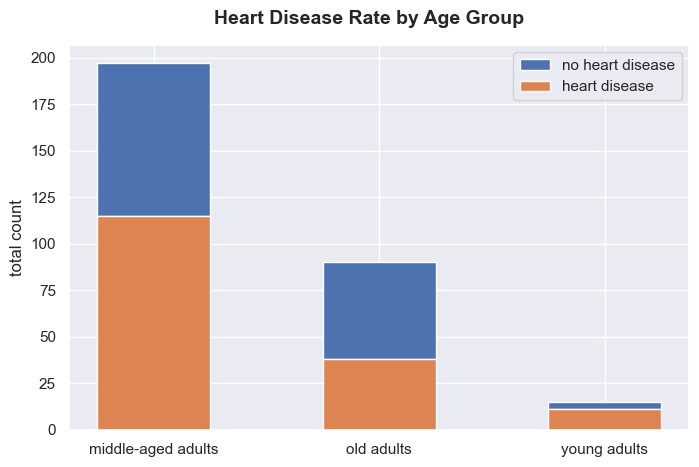

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(hd_by_age.index,
       hd_by_age[0],
       bottom=hd_by_age[1],
       label='no heart disease',
       width=0.5)

ax.bar(hd_by_age.index,
       hd_by_age[1],
       label='heart disease',
       width=0.5)

ax.legend()
ax.set_ylabel('total count')

fig.suptitle('Heart Disease Rate by Age Group',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [19]:
hd_by_age

target,0,1,total_count,% no heart disease (rel),% heart disease (rel)
age_group,,,,,
middle-aged adults,82,115,197,41.62,58.38
old adults,52,38,90,57.78,42.22
young adults,4,11,15,26.67,73.33


* The majority of patients are <b>middle-aged adults </b> with `58%` of them having heart disease.
* Only 15 patients in total are <b>young adults</b>, however, `73%` of them have heart disease.
* <b>Old adults</b> patients have the lowest prevalence of heart disease — `42%`, among the three age groups.

>> #### Heart Disease Rate by Chest Pain Type
>> `cp` - chest pain type
>> * 0: Typical angina: chest pain related decrease blood supply to the heart
>> * 1: Atypical angina: chest pain not related to heart
>> * 2: Non-anginal pain: typically esophageal spasms (non heart related)
>> * 3: Asymptomatic: chest pain not showing signs of disease

In [20]:
df['cp'].value_counts().sort_index()

cp
0    143
1     50
2     86
3     23
Name: count, dtype: int64

In [21]:
hd_by_cp = pd.crosstab(df['cp'], df['target'])

hd_by_cp.index = ['[0] typical angina', '[1] atypical angina', '[2] non-anginal pain', '[3] asymptomatic']

hd_by_cp['total_count'] = hd_by_cp[0] + hd_by_cp[1]
hd_by_cp['% no heart disease (rel)'] = np.round(hd_by_cp[0] / hd_by_cp['total_count'] * 100, 2)
hd_by_cp['% heart disease (rel)'] = np.round(hd_by_cp[1] / hd_by_cp['total_count'] * 100, 2)

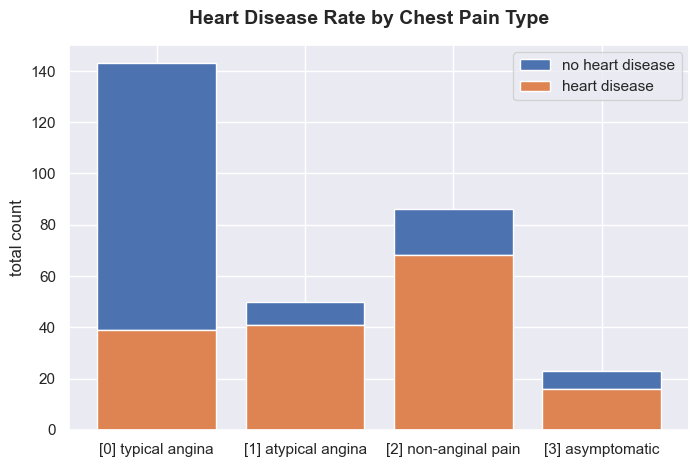

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(hd_by_cp.index,
       hd_by_cp[0],
       label='no heart disease',
       bottom=hd_by_cp[1])
ax.bar(hd_by_cp.index,
       hd_by_cp[1],
       label='heart disease')

ax.set_ylabel('total count')

ax.legend()

fig.suptitle('Heart Disease Rate by Chest Pain Type',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [23]:
hd_by_cp

target,0,1,total_count,% no heart disease (rel),% heart disease (rel)
[0] typical angina,104,39,143,72.73,27.27
[1] atypical angina,9,41,50,18.00,82.00
[2] non-anginal pain,18,68,86,20.93,79.07
[3] asymptomatic,7,16,23,30.43,69.57


* Patients with <b>typical angina</b> have the lowest relative percentage of heart disease — `27.2%`, indicating that typical angina is less frequently associated with heart disease compared to other types of chest pain.
* Patients with <b>aypical angina</b>  have the highest relative percentage of heart disease — `82%`, suggesting a strong association between atypical angina and heart disease.
* A high percentage of patients with <b>non-anginal pain</b> — `79%` have heart disease, indicating that non-anginal pain is also strongly associated with heart disease.
* A significant percentage of <b>asymptomatic</b> patients — `69.5%` have heart disease, suggesting that even individuals without symptoms, a substantial number of individuals may have heart disease.

>> #### Heart Disease Rate by Exercise Induced Angina

In [24]:
df['exang'].value_counts().sort_index()

exang
0    203
1     99
Name: count, dtype: int64

In [25]:
hd_by_exang = pd.crosstab(df['exang'], df['target'])

hd_by_exang['total_count'] = hd_by_exang[0] + hd_by_exang[1]
hd_by_exang['% no heart disease (rel)'] = np.round(hd_by_exang[0] / hd_by_exang['total_count'] * 100, 2)
hd_by_exang['% heart disease (rel)'] = np.round(hd_by_exang[1] / hd_by_exang['total_count'] * 100, 2)

hd_by_exang.index = ['no exercise induced angina', 'exercise induced angina']

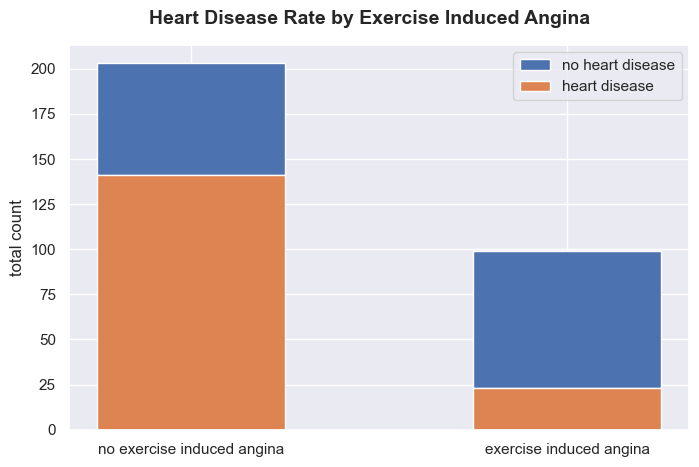

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(hd_by_exang.index,
       hd_by_exang[0],
       label='no heart disease',
       bottom=hd_by_exang[1],
       width=0.5)
ax.bar(hd_by_exang.index,
       hd_by_exang[1],
       label='heart disease',
       width=0.5)

ax.legend()
ax.set_ylabel('total count')

fig.suptitle('Heart Disease Rate by Exercise Induced Angina',
             y=0.95,
             fontsize=14,
             fontweight='bold');

In [27]:
hd_by_exang

target,0,1,total_count,% no heart disease (rel),% heart disease (rel)
no exercise induced angina,62,141,203,30.54,69.46
exercise induced angina,76,23,99,76.77,23.23


* The number of patients with no exercise-induced angina is over twice the number of patients with exercise-induced angina.
* Suprisingly, the larger proportion of patients with <b>no exercise-induced angina</b> — `69.4%` actually have heart disease, contrary to usual expectations where exercise-induced angina is often seen as a high risk factor for heart disease.
* Conversely, `76.7%` of patients with <b>exercise-induced angina</b> do not have heart disease.

Such contridication may indicate the presence of <b>Sampling Bias</b> in our dataset, i.e. the sample is not representative of the whole population.

>>> #### Exercise-Induced Angina by Average:
>>> * Resting Blood Pressure
>>> * Serum Cholestoral Level
>>> * Maximum Heart Rate

In [28]:
exang_by_avgs = df.groupby(['exang']).agg(avg_trestbps=('trestbps', 'mean'),
                                          avg_chol=('chol', 'mean'),
                                          avg_thalach=('thalach', 'mean'),
                                          avg_oldpeak=('oldpeak', 'mean'))

exang_by_avgs.columns = ['resting blood pressure', 'serum cholesterol level', 'max heart rate', 'ST depression']
exang_by_avgs.index = ['no exercise-induced angina', 'exercise-induced angina']

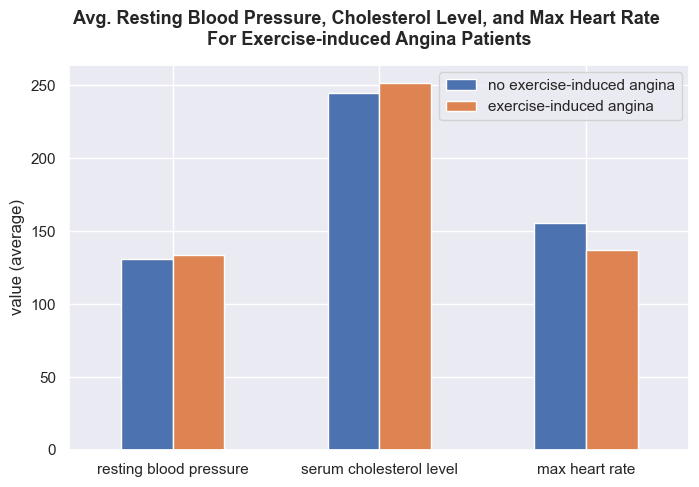

In [121]:
fig, ax = plt.subplots(figsize=(8, 5))

exang_by_avgs.loc[:, exang_by_avgs.columns != 'ST depression'].T.plot(kind='bar', ax=ax)

ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('value (average)');

fig.suptitle('Avg. Resting Blood Pressure, Cholesterol Level, and Max Heart Rate \nFor Exercise-induced Angina Patients',
             y=0.99,
             fontsize=13,
             fontweight='bold');

In [30]:
exang_by_avgs

,resting blood pressure,serum cholesterol level,max heart rate,ST depression
no exercise-induced angina,130.763547,244.187192,155.596059,0.810837
exercise-induced angina,133.323232,251.242424,137.212121,1.519192


* Patients with <b>exercise-induced angina</b> have a slightly <b>higher average resting blood pressure</b>. Elevated resting blood pressure might indicate a higher baseline cardiovascular strain in this group.
* Exercise-induced angina patients have <b>higher cholesterol levels </b> on average, which is a risk factor for coronary artery disease and could contribute to the incidence of angina during physical activity.
* Exercise-induced angina patients have a <b>lower average maximum heart rate</b>, which could indicate poorer cardiovascular fitness or a more conservative approach to exercise due to angina symptoms. Higher maximum heart rates typically reflect better cardiovascular health.
* Lastly, patients in the exercise-induced angina group have a <b>higher ST depression </b> score on average, which suggests more significant heart strain and a higher likelihood of coronary artery disease.

These results suggest that individuals with exercise-induced angina have several indicators of higher cardiovascular risk, including higher blood pressure, cholesterol, and ST depression during exercise. This <u>aligns with the expectation</u> that exercise-induced angina is associated with underlying coronary artery disease.

>> #### Heart Disease Rate by ST Peak Slope
>> the slope of the peak exercise ST segment
>> * 0: Upsloping: better heart rate with excercise (uncommon)
>> * 1: Flatsloping: minimal change (typical healthy heart)
>> * 2: Downsloping: signs of unhealthy heart

In [31]:
df['slope'].value_counts().sort_index()

slope
0     21
1    140
2    141
Name: count, dtype: int64

In [32]:
hd_by_slope = pd.crosstab(df['slope'], df['target'])

hd_by_slope.index = ['0 - Upsloping', '1 - Flatsloping', '2 - Downsloping']

hd_by_slope

target,0,1
0 - Upsloping,12,9
1 - Flatsloping,91,49
2 - Downsloping,35,106


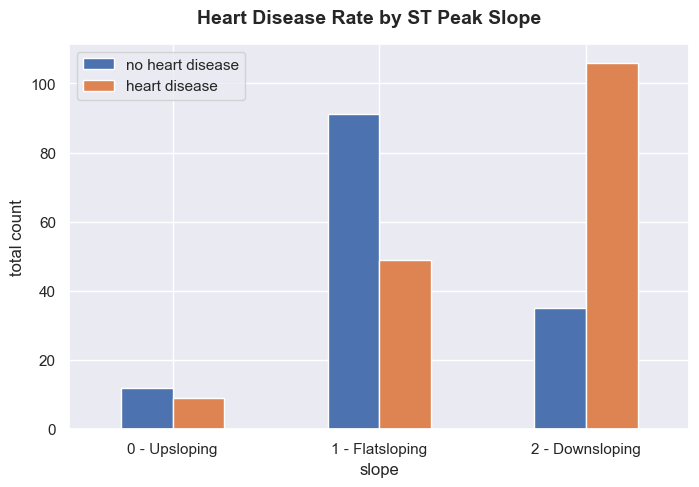

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

hd_by_slope.plot.bar(ax=ax)

ax.set_ylabel('total count')
ax.set_xlabel('slope')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax.legend(['no heart disease', 'heart disease'])

fig.suptitle('Heart Disease Rate by ST Peak Slope',
            y=0.95,
            fontsize=14,
            fontweight='bold');

The bar plot shows the relationship between the ST peak slope of the exercise-induced ST segment and the prevalence of heart disease among patients.
* <b>Upsloping ST</b> segments are less commonly associated with heart disease compared to the other types.
* <b>Flatsloping ST</b> segments have a moderate risk association with heart disease, with a noticeable presence of both heart disease and no heart disease cases.
* <b>Downsloping ST</b> segments are strongly associated with heart disease, indicating a higher prevalence of heart disease in patients with this type of ST segment.

>> #### Heart Disease Rate by Colored Vessels
>> ca - number of major vessels (0-3) colored by flourosopy
>> * colored vessel means the doctor can see the blood passing through
>> * the more blood movement the better (no clots)

In [34]:
df['ca'].value_counts().sort_index()

ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

In [35]:
hd_by_ca = pd.crosstab(df['ca'], df['target'])

hd_by_ca

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,3


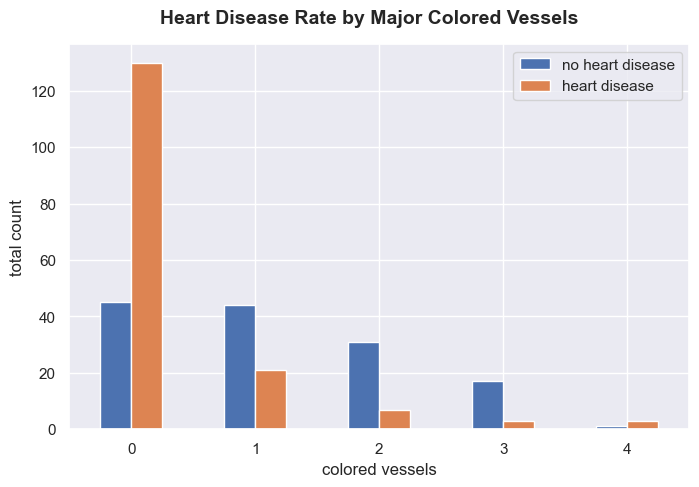

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))

hd_by_ca.plot.bar(ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('colored vessels')
ax.set_ylabel('total count')

ax.legend(['no heart disease', 'heart disease'])

fig.suptitle('Heart Disease Rate by Major Colored Vessels',
            y=0.95,
            fontsize=14,
            fontweight='bold');

The bar plot shows the relationship between the number of major vessels colored by fluoroscopy (ranging from 0 to 4) and the prevalence of heart disease.

* Patients with <b>no major colored vessels</b> are highly likely to have heart disease.
* As the number of major colored vessels increases, the presence of heart disease decreases.

>> #### Heart Disease Rate by Thalium Stress Results
>> thal - thalium stress result
>> * 1,3: normal
>> * 6: fixed defect: used to be defect but ok now
>> * 7: reversable defect: no proper blood movement when exercising

In [37]:
df['thal'].value_counts().sort_index()

thal
0      2
1     18
2    165
3    117
Name: count, dtype: int64

In [38]:
hd_by_thal = pd.crosstab(df['thal'], df['target'])

hd_by_thal

target,0,1
thal,,
0,1,1
1,12,6
2,36,129
3,89,28


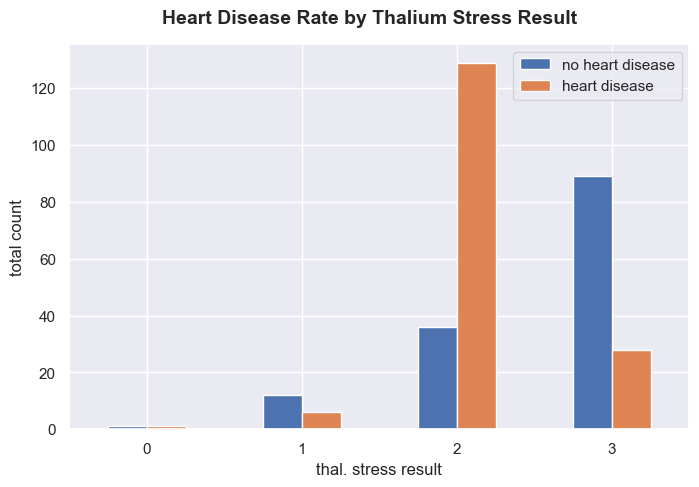

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))

hd_by_thal.plot.bar(ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('thal. stress result')
ax.set_ylabel('total count')

ax.legend(['no heart disease', 'heart disease'])

fig.suptitle('Heart Disease Rate by Thalium Stress Result',
            y=0.95,
            fontsize=14,
            fontweight='bold');

The bar plot shows the relationship between the Thallium stress test results (ranging from 0 to 3) and the prevalence of heart disease among patients.

* <b>Thalium Stress Result 2</b> is strongly associated with heart disease, suggesting a higher heart disease risk for individuals.
* Conversely, <b>Thalium Stress Result 3</b> is more associated with no heart disease, suggesting a lower risk compared to result 2.
* There is not enough data to draw insights from Result 0 and 1.

## 5. Modelling

For this classification problem, we are going to try 3 different models:
1. `Logistic Regression`
2. `K-Nearest Neighbors Classifier`
3. `Random Forest Classifier` 

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,old adults
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,young adults
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,middle-aged adults
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,middle-aged adults
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,middle-aged adults


In [66]:
# Split data into features and labels
X = df.drop(columns=['age_group', 'target'], axis=1) ## age_group is the derived column from EDA
y = df['target']

# Set static seed for reproduceability
np.random.seed(42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Create custom function to train and fit models
models = {'Logistic Regression': LogisticRegression(),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

def train_fit_models(models, X_train, X_test, y_train, y_test):
    '''
    models: dictionary holding 3 ML classification models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels (no features)
    y_test: testing and validation labels (no features)
    
    '''

    # Create dictionary to hold models' scores
    scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit models to data
        model.fit(X_train, y_train)
        # Evaluate models and append to scores dictionary
        scores[name] = model.score(X_test, y_test)
    # Return models' scores
    return scores

In [67]:
# Evaluating models
models_eval = train_fit_models(models, X_train, X_test, y_train, y_test)

models_eval

C:\ml_data_science\milestone_projects_environment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'K-Nearest Neighbors': 0.7213114754098361,
 'Random Forest': 0.8688524590163934}

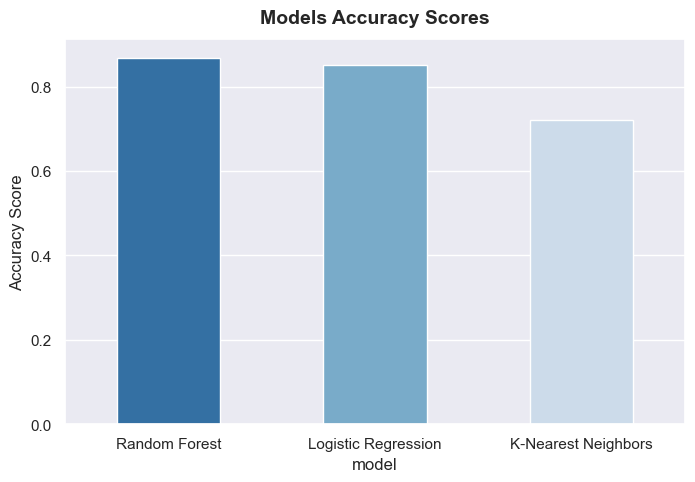

In [68]:
# Visualize and compare scores
df_eval = pd.DataFrame(list(models_eval.items()),
                       columns=['model', 'accuracy']).sort_values(by='accuracy', ascending=False)

fig, ax = plt.subplots(figsize=(8, 5)) # seaborn alternative: sns.set(rc={'figure.figsize': (8, 5)})

col_pal = sns.color_palette('Blues_r', len(df_eval))

ax = sns.barplot(data=df_eval,
                 x='model',
                 y='accuracy',
                 palette=col_pal,
                 width=0.5,
                 hue=df_eval['model'])
ax.set_ylabel('Accuracy Score')
ax.set_title('Models Accuracy Scores',
             y=1.02,
             fontsize=14,
             fontweight='bold');

In [69]:
df_eval

,model,accuracy
2,Random Forest,0.868852
0,Logistic Regression,0.852459
1,K-Nearest Neighbors,0.721311


Baseline <b>Random Forest Classifier</b> and <b>Logistic Regression</b> models outperform the <b>K-Nearest Neighbors</b> model with `86.8%` and `85.2%` accuracy scores respectively compared to latter with `72.1%`.

The next steps involve tuning our classification models in an attempt to achieve a <b>95%</b> accuracy success. We'll be experimenting with the followings:
* Hyperparameters tuning
* ROC curve and AUC score
* Confusion Matrix
* Cross-validation
* Precision, Recall, and F1 scores
* Feature importance

## Experimentation & Evaluation

> #### Hyperparameters Tuning

>> 1. `K-Nearest Neighbors` Tuning

In [70]:
# Create score lists
train_scores = []
test_scores = []

# Create a list of different n-neighbors values
neighbors = range(1, 21)

# Instantiate KNN
KNN = KNeighborsClassifier()

# Loop through different n-neighbors
for n in neighbors:
    KNN.set_params(n_neighbors=n)
    # Fit model
    KNN.fit(X_train, y_train)
    # Append train and test scores
    train_scores.append(KNN.score(X_train, y_train))
    test_scores.append(KNN.score(X_test, y_test))

In [71]:
# Get max scores
max_train_score = np.max(train_scores)
max_test_score = np.max(test_scores)

max_train_score, max_test_score

(1.0, 0.7704918032786885)

Max train accuracy score: 100.00%
Max test accuracy score: 77.05%


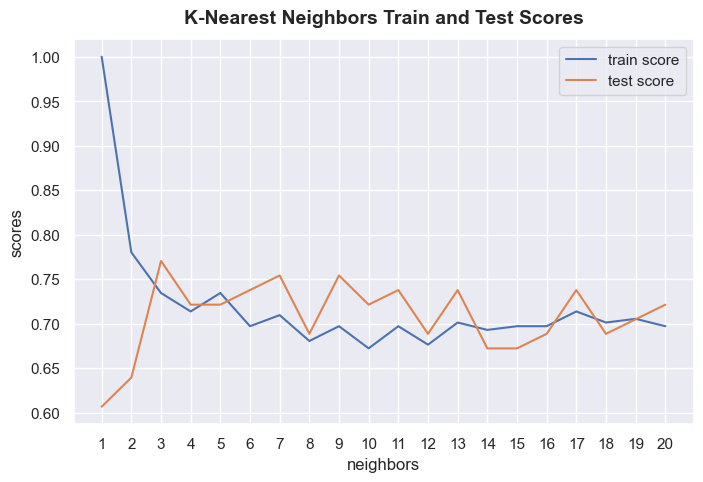

In [72]:
# Visualize scores
plt.figure(figsize=(8, 5))
plt.plot(neighbors,
         train_scores,
         label='train score')
plt.plot(neighbors,
         test_scores,
         label='test score')
plt.xticks(neighbors)

plt.ylabel('scores')
plt.xlabel('neighbors')
plt.legend()

plt.title('K-Nearest Neighbors Train and Test Scores',
          y=1.02,
          fontsize=14,
          fontweight='bold');

print(f'Max train accuracy score: {max_train_score * 100:.2f}%\nMax test accuracy score: {max_test_score * 100:.2f}%')

Increasing the number of <b>neighbors</b> yields an improvement by approx. `5%`.

As a reminder, our <b>measure of success</b> is set to `95%` accuracy score, so we'll turn our attention to tuning the <b>Logistic Regression</b> and <b>Random Forest Classifier</b> models.

>> 2. `Random Forest Classifier` and `Logistic Regression` Tuning using <b>RandomizedSeachCV</b>

>>> 2.1. `Logistic Regression` Tuning:

In [73]:
# Create hyperparameter grid for Logistic Regression
logreg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

In [74]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search
rs_logreg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=logreg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)

# Fit RandomizedSearchCV to data
rs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [75]:
rs_logreg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [76]:
rs_logreg.score(X_test, y_test)

0.9016393442622951

Adjusting the `C` (Strength of Regularization) and `solver` for the <b>Logistic Regression</b> model yields a `4%` accuracy score improvement over the baseline model.

The tuned <b>Logistic Regression</b> model now performs at `90%` accuracy. 

>>> 2.2. `RandomForestClassifier` Tuning:

In [78]:
# Create hyperparameter grid for Random Forest Classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [80]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50,
                           verbose=2)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.3s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [81]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_depth': None}

In [82]:
rs_rf.score(X_test, y_test)

0.8524590163934426

The <b>Random Forest Classifier</b> model still performs at 85% baseline accuracy. 

>> 3. `Logistic Regression` Tuning using <b>GridSearchCV</b>

In [91]:
# Create a different hyperparameters grid for Logistic Regression
logreg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Set up hyperparameter Grid Search
gs_logreg = GridSearchCV(LogisticRegression(),
                         param_grid=logreg_grid,
                         cv=5,
                         verbose=True)

# Fit GridSearchCV to data
gs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [92]:
# Check best parameters
gs_logreg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [93]:
gs_logreg.score(X_test, y_test)

0.9016393442622951

In [94]:
models_eval

{'Logistic Regression': 0.8524590163934426,
 'K-Nearest Neighbors': 0.7213114754098361,
 'Random Forest': 0.8688524590163934}

As the tuned <b>Logistic Regression</b> model yielded the highest accuracy score — `90%`, we'll be using it for the remainder of our experimentation, specifically the <u>evaluation phase</u>.

> #### ROC Curve and AUC Score

In [95]:
# Make prediction with tuned GridSearchCV model
y_preds = gs_logreg.predict(X_test)

y_preds

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [96]:
np.array(y_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

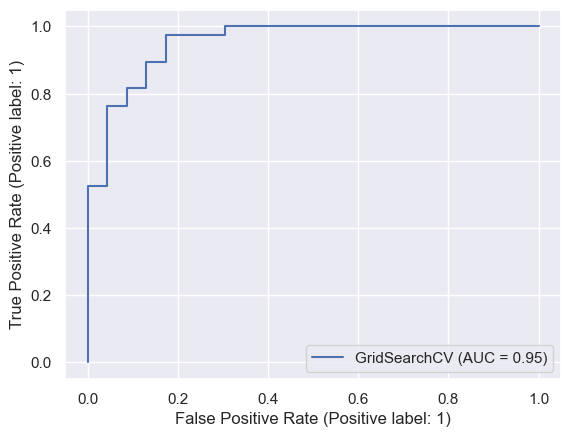

In [97]:
# Plot ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_logreg, X_test, y_test)

* The tuned Logisitic Regression's <b>ROC curve</b> (Receiver Operating Characteristic) shows a strong performance as it bows towards the top left corner, indicating that the model has a high true positive rate and a low false positive rate.
* The high <b>AUC</b> (Area Under Curve) value — `0.95`, indicates that the model performs really well in distinguishing between the positive and negative classes.

> #### Confusion Matrix

In [98]:
# Using scikit-learn built-in confusion matrix function
confusion_matrix(y_test, y_preds)

array([[19,  4],
       [ 2, 36]], dtype=int64)

In [99]:
# Visualize Confusion Matrix with Seaborn
def plot_conf_mat(preds, test):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predicted Labels')

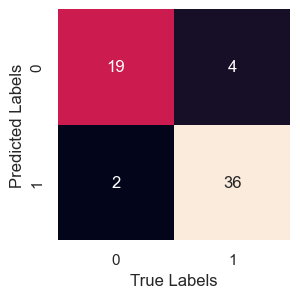

In [100]:
plot_conf_mat(y_test, y_preds)

The <b>Confusion Matrix</b> provides a detailed view of the model's performance at predicting True (postive) and False (negative) labels.

* True Negatives (TN): 19 instances
* True Positives (TP): 36 instances
* False Negatives (FN): 2 instances
* False Postives (FP): 4 instances
1. <b>Accuracy</b>: TP+TN+FP+FN / TP+TN = 36+19+4+2 / 36+19 = 61 / 55 = ~ `0.90` or `90%`.
2. <b>Precision</b>: TP / TP+FP = 36 / 36+4 = 36 / 40 = `0.90` or `90%`.
3. <b>Recall</b>: TP / TP+FN = 36 / 36+2 = 36 / 38  = `0.95` or `95%`.
4. <b>F1 Score</b>: 2 * (Precision*Recall / Precision+Recall) = 2 * (0.90 * 0.95 / 0.90 + 0.95) = ~ `0.92` or `92%`.

Overall, the confusion matrix indicates that the model is performing well across all metrics.


> #### Classification Report

In [101]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.90      0.95      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



The <b>Classification Report</b> provides even further deep down of the model's performance at predicting True and False labels with regards to <u>data balance</u>.

Although the model has a high precision score, we can see that it performs slightly better at predicting True labels than False labels, which can be attributed to <b>Class Imbalance</b> — 0 : `23` labels, 1: `38` labels.

> #### Evaluation Metrics with Cross-Validation

Calculate tuned model's precision, recall and f1-score using `cross_val_score()`

In [106]:
# Cross-validated accuracy, precision, recall and F1
cv_acc_score = cross_val_score(gs_logreg, X, y)
cv_pre_score = cross_val_score(gs_logreg, X, y, scoring='precision')
cv_rec_score = cross_val_score(gs_logreg, X, y, scoring='recall')
cv_f1_score = cross_val_score(gs_logreg, X, y, scoring='f1')

print(f'\nAccuracy Score: {cv_acc_score}\nPrecision Score: {cv_pre_score}\nRecall Score: {cv_rec_score}\nF1-Score: {cv_f1_score}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 

In [107]:
# Store scores in a dictionary
cv_scores = {'accuracy': cv_acc_score,
             'precision': cv_pre_score,
             'recall': cv_rec_score,
             'f1': cv_f1_score}

In [108]:
# Turn cross-validated scores into a dataframe and get the mean
df_cv_scores = pd.DataFrame(cv_scores).T

df_cv_scores.columns = [f'{i+1}-fold' for i in range(len(df_cv_scores.columns))]

df_cv_scores['average score'] = df_cv_scores.mean(axis=1)

df_cv_scores

,1-fold,2-fold,3-fold,4-fold,5-fold,average score
accuracy,0.819672,0.901639,0.883333,0.866667,0.750000,0.844262
precision,0.775000,0.885714,0.882353,0.837838,0.717949,0.819771
recall,0.939394,0.939394,0.909091,0.939394,0.875000,0.920455
f1,0.849315,0.911765,0.895522,0.885714,0.788732,0.866210


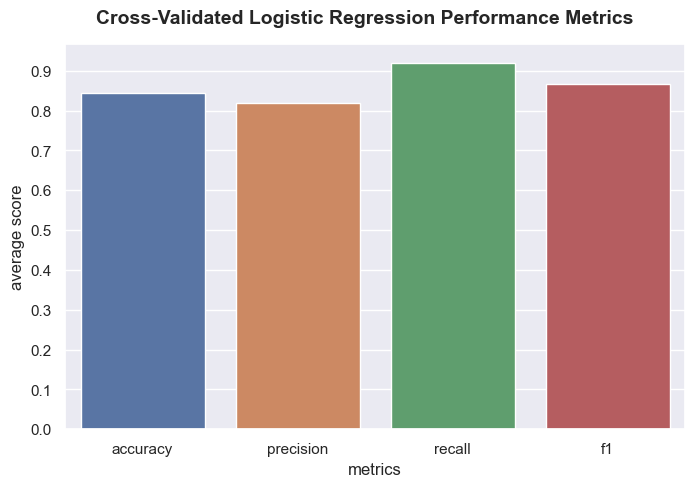

In [109]:
# Visualize all 4 metrics
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(data=df_cv_scores,
                 x=df_cv_scores.index,
                 y=df_cv_scores['average score'],
                 hue=df_cv_scores.index)

ax.set_xlabel('metrics')
ax.set_yticks(np.arange(0, 1, 0.1))

fig.suptitle('Cross-Validated Logistic Regression Performance Metrics',
             y=0.95,
             fontsize=14,
             fontweight='bold');

* The Logistic Regression model demonstrates strong performance across all 4 metrics, with particularly high <b>Recall</b>, suggesting its efficacy in identifying positive instances.
* The high <b>Recall</b> and <b>F1</b> scores indicate the model's strong ability to correctly identify positive cases while maintaining a good balance with precision.
* The performance metrics are consistent across the <b>5 folds</b> with slight variations. This consistency suggests the model is stable and reliable.

> #### Feature Importance

<b>Feature Importance</b> tells us which features in the data contributed the most to the outcomes of the model and how much did they contribute. <br>
This process is otherwise known as <u>Model-driven EDA</u>.

In [110]:
gs_logreg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [111]:
# Create new instance of our tuned model and fit to data
logreg_clf = LogisticRegression(C=gs_logreg.best_params_['C'],
                                solver=gs_logreg.best_params_['solver']).fit(X_train, y_train)

logreg_clf.score(X_test, y_test)

0.9016393442622951

In [112]:
# Check contribution coefficient
logreg_clf.coef_

array([[ 0.00358961, -0.58430754,  0.58276497, -0.01186402, -0.00121721,
         0.05189656,  0.20833371,  0.02001341, -0.40293875, -0.45523342,
         0.28297612, -0.52112046, -0.42401845]])

In [114]:
# Turn the coefficients array into a dataframe
df_coeff = pd.DataFrame(data=logreg_clf.coef_,
                        columns=df.loc[:, (df.columns != 'target') & (df.columns != 'age_group')].columns,
                        index=['coeff']).T

df_coeff

,coeff
age,0.003590
sex,-0.584308
cp,0.582765
trestbps,-0.011864
chol,-0.001217
fbs,0.051897
restecg,0.208334
thalach,0.020013
exang,-0.402939
oldpeak,-0.455233


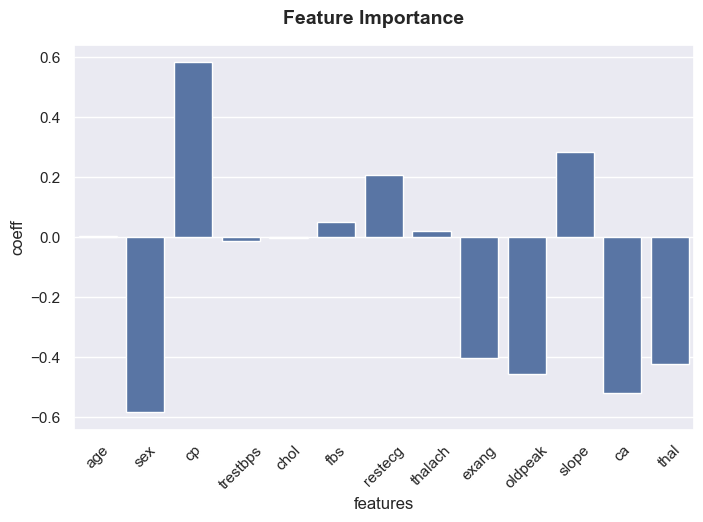

In [117]:
# Visualize Features Importance
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(data=df_coeff,
                 x=df_coeff.index,
                 y=df_coeff.coeff)
ax.set_xlabel('features')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45);

fig.suptitle('Feature Importance',
              y=0.95,
              fontsize=14,
              fontweight='bold');

The bar chart provides an overview of the <b>Feature Importance</b> for the Logistic Regression model, indicating the <u>coefficient</u> of each feature and its contribution to predicting the target labels.
* `cp` (chest pain type) `slope` (the slope of the peak exercise ST segment), and `restecg` (resting electrocardiographic results) are the most influential postive feature leading to an increased presence of heart disease.
* `sex` (0: female - 1: male), `ca` (major colored vessels) and `oldpeak` (ST depression induced by exercise relative to rest) are the most influential negative features leading to a decrease in heart disease.

### Conclusion

In this analysis, we've built, fine-tuned and evaluated a classification model to predict the likelihood of patients having heart disease. The model demonstrated strong performance as shown by the cross-validated metrics — <b>Accuracy</b>: `84.4%`, <b>Precision</b>: `81.9%`, <b>Recall</b>: `92%` and <b>F1 score</b>: `86.6%`. The ROC curve of the model showed an AUC score of `0.95`, further demonstrating its ability to correctly distinguish between the positive and negative classes. Lastly, we've looked at the Feature Importance for the model which revealed key insights influencing the prelavence of heart disease. This also helped us understanding the model's decision making process, as well as validating our initial data exploration findings. 

Although these results look promising as a proof of concept, we still haven't reached our measurement of success of `95%` prediction accuracy.

##### Next steps

* Further fine-tune the Logistic Regression model by adjusting different hyperparameters.
* Collect more data to improve the model's performance and predictive accuracy.
* Perform external validation to confirm the model's generalizability.